#Linear Regress

Шугаман сургалт нь хяналтгүй сургалтын алгоритм юм.

Өгөгдлийг дүрсэлсэн хамгийн сайн шугамаг хамаарлыг олохыг оролддог


Сангууд

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('USA_Housing Up.csv')
data.head()

,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberofRooms,AvgAreaNumberofBedrooms,AreaPopulation,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


Ерөнхий статистик харах

In [ ]:
data.describe(include='all')

,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberofRooms,AvgAreaNumberofBedrooms,AreaPopulation,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,5000
top,NaN,NaN,NaN,NaN,NaN,NaN,"49686 Walker Burg Apt. 611\nHuynhmouth, VI 869..."
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,NaN
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,NaN
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,NaN
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05,NaN
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06,NaN
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06,NaN


In [ ]:
# хоосон эсэхийг шалгах
data.isnull().sum()

AvgAreaIncome              0
AvgAreaHouseAge            0
AvgAreaNumberofRooms       0
AvgAreaNumberofBedrooms    0
AreaPopulation             0
Price                      0
Address                    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


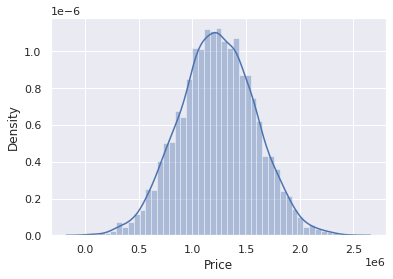

In [ ]:
# Тархалт
sns.distplot(data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


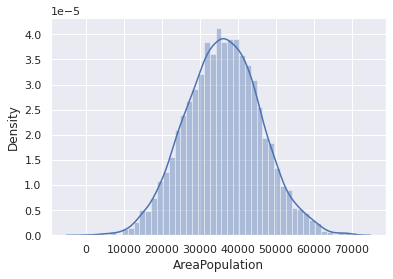

In [ ]:
sns.distplot(data['AreaPopulation'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


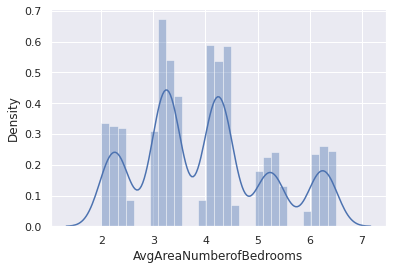

In [ ]:
sns.distplot(data['AvgAreaNumberofBedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


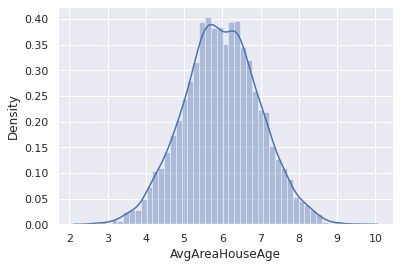

In [ ]:
sns.distplot(data['AvgAreaHouseAge'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


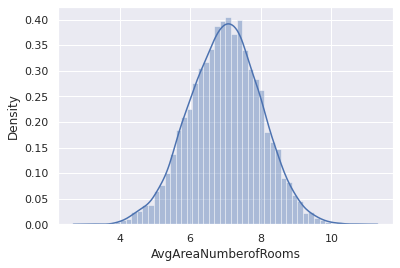

In [ ]:
sns.distplot(data['AvgAreaNumberofRooms'])

##Шугаман регресс - Simple Linear Regression (SLR)

Шугаман регресс нь хамааран ба үл хамааран(independent - explanatory)

хувьсагчдын хоорондын шугаман хамааралыг загварчилдаг

###Өгөдөлийг дүрслэн харуулах

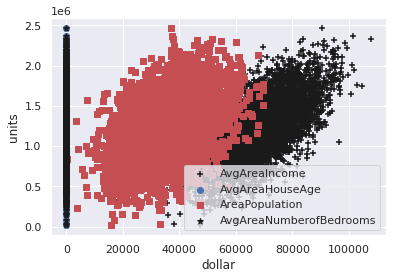

In [ ]:
plt.scatter(x=data['AvgAreaIncome'], y=data['Price'],c='k',marker='+',label='AvgAreaIncome')
plt.scatter(x=data['AvgAreaHouseAge'], y=data['Price'],c='b',marker='o',label='AvgAreaHouseAge')
plt.scatter(x=data['AreaPopulation'], y=data['Price'],c='r',marker='s',label='AreaPopulation')
plt.scatter(x=data['AvgAreaNumberofBedrooms'], y=data['Price'],c='k',marker='*',label='AvgAreaNumberofBedrooms')

plt.legend(numpoints=1, loc=4)
plt.xlabel('dollar')
plt.ylabel('units')
plt.show()

Дүгнэлт:
  
  Графикаас харахад  бүгд хамааралттай харагдаж байна areaIncome жоохон хазайлттай

Expected Value: 
  
  Тоон тархалтын дундаж утгыг нь expected value буюу туршилтын утга гэж нэрлэдэг.

Variance:

  Тоон тархалтын далайцыг Variance гэж нэрлэдэг

Standart deviation: 

  Тархалтын хазайлтыг стандарт хазайлт гэж нэрлэдэг 

intercept : огтолцол

coefficient : нь урьдчилан таамаглах хувьсагч ба хариултын хувьсагчийн хоорондын хамааралын чиглэлийг заана (y нэмэгдэхийн хэрээр x нэмэгдэнэ)

In [ ]:
# Таамаглах утга
X = data[['AvgAreaIncome','AvgAreaHouseAge','AvgAreaNumberofRooms','AvgAreaNumberofBedrooms','AreaPopulation']]

In [ ]:
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=101)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Загварын үнэлгээ

In [ ]:
print(lm.intercept_)

-2640159.796813771


In [ ]:
coeff_data = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
AvgAreaIncome,21.528276
AvgAreaHouseAge,164883.282027
AvgAreaNumberofRooms,122368.678023
AvgAreaNumberofBedrooms,2233.801864
AreaPopulation,15.150420


In [ ]:
predictions = lm.predict(X_test)

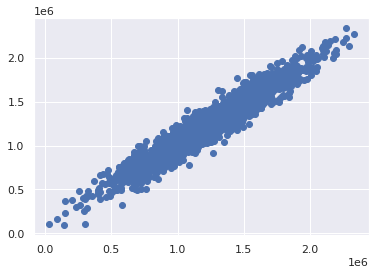

In [ ]:
plt.scatter(y_test, predictions)

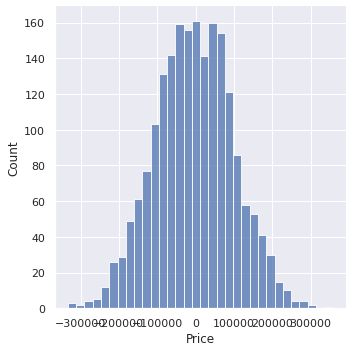

In [ ]:
sns.displot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

82288.2225072179

In [ ]:
metrics.mean_squared_error(y_test, predictions)

10460958905.774704

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82921589738

In [ ]:
advert = data

In [ ]:
import statsmodels.formula.api as sm
ad_pop_ols = sm.ols(formula='Price ~ AreaPopulation', data=advert).fit()
ad_pop_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     1001.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          1.74e-200
Time:                        06:20:34   Log-Likelihood:                -70510.
No. Observations:                5000   AIC:                         1.410e+05
Df Residuals:                    4998   BIC:                         1.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.064e+05   1.72e+04     41.014      0.000    6.73e+05     7.4e+05
AreaPopulation    14.5349      0.459     31.645      0.000      13.634      15.435
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.271
Skew:                          -0.017   Prob(JB):                        0.873
Kurtosis:                       2.988   Cond. No.                     1.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

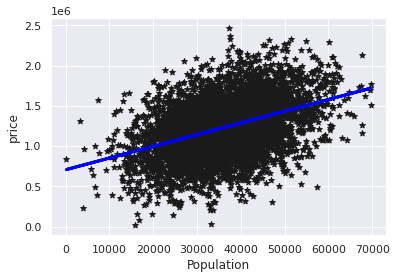

In [ ]:
plt.scatter(x=data['AreaPopulation'], y=data['Price'],c='k',marker='*',label='AreaPopulation')
plt.plot(data['AreaPopulation'], ad_pop_ols.predict(),'k',color='blue',linewidth=3)

plt.xlabel('Population')
plt.ylabel('price')
plt.show()

##Олон хэмжээст шугаман регресс 

In [ ]:
import statsmodels.formula.api as sm
advert = pd.read_csv('USA_Housing Up.csv')

In [ ]:
avgAge = "Avg. Area House Age"
avgNRooms = "Avg. Area Number of Rooms"
aPop = "Area Population"
ad_all_ols = sm.ols(formula="Price ~ AvgAreaHouseAge + AvgAreaNumberofRooms + AreaPopulation", data=advert).fit()
ad_all_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1625.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:23:02   Log-Likelihood:                -69265.
No. Observations:                5000   AIC:                         1.385e+05
Df Residuals:                    4996   BIC:                         1.386e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.123e+06   3.56e+04    -31.521      0.000   -1.19e+06   -1.05e+06
AvgAreaHouseAge       1.651e+05   3585.799     46.042      0.000    1.58e+05    1.72e+05
AvgAreaNumberofRooms  1.191e+05   3533.931     33.696      0.000    1.12e+05    1.26e+05
AreaPopulation          14.8194      0.358     41.376      0.000      14.117      15.522
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.228
Skew:                          -0.016   Prob(JB):                        0.892
Kurtosis:                       2.989   Cond. No.                     3.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Interpretation

Тэг буюу үндсэн таамаглал нь
Олон хэмжээст шугаман регрессийн хувьд таамаглал шалгах статистик нь : F-тест


$ -1<=Корреляцийн утга <=1

Корреляцийн матриц нь хувьсагчуудын хоорондын хамаарлыг харуулах аргуудын нэг юм.

                         AvgAreaIncome  ...     Price
AvgAreaIncome                 1.000000  ...  0.639734
AvgAreaHouseAge              -0.002007  ...  0.452543
AvgAreaNumberofRooms         -0.011032  ...  0.335664
AvgAreaNumberofBedrooms       0.019788  ...  0.171071
AreaPopulation               -0.016234  ...  0.408556
Price                         0.639734  ...  1.000000

[6 rows x 6 columns]


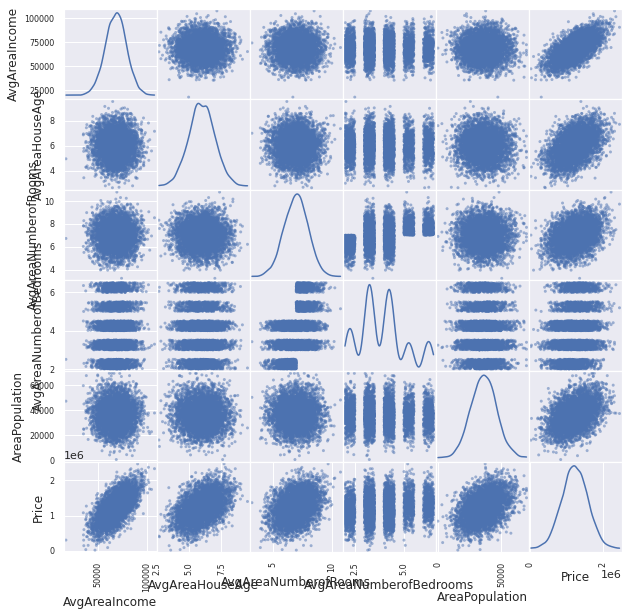

In [ ]:
print(advert.corr())
pd.plotting.scatter_matrix(advert, figsize=(10,10), diagonal='kde')
plt.show()

In [ ]:
room_ols = sm.ols(formula="Price ~ AreaPopulation + AvgAreaNumberofRooms", data=advert).fit()
room_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     967.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        05:00:53   Log-Likelihood:                -70149.
No. Observations:                5000   AIC:                         1.403e+05
Df Residuals:                    4997   BIC:                         1.403e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.141e+05   3.35e+04     -3.404      0.001    -1.8e+05   -4.84e+04
AreaPopulation          14.5106      0.427     33.956      0.000      13.673      15.348
AvgAreaNumberofRooms  1.175e+05   4216.947     27.876      0.000    1.09e+05    1.26e+05
==============================================================================
Omnibus:                        0.417   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.438
Skew:                          -0.021   Prob(JB):                        0.803
Kurtosis:                       2.983   Cond. No.                     2.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  # Remove the CWD from sys.path while we load stuff.


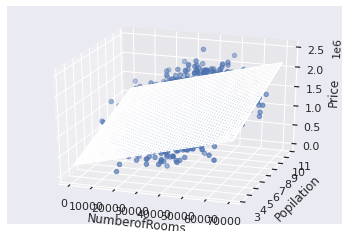

In [ ]:
import scipy as sc
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=advert['AreaPopulation'], ys=advert['AvgAreaNumberofRooms'], zs=advert['Price'])
x = sc.linspace(advert['AreaPopulation'].min(), advert['AreaPopulation'].max(), 100)
y = sc.linspace(advert['AvgAreaNumberofRooms'].min(), advert['AvgAreaNumberofRooms'].max(), 100)

X,Y = sc.meshgrid(x,y)
par = dict(room_ols.params)
Z = par["Intercept"] + par["AreaPopulation"]*X + par["AvgAreaNumberofRooms"]*Y 
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('NumberofRooms')
ax.set_ylabel('Popilation')
ax.set_zlabel('Price')

plt.show()

In [ ]:
advert.head()

,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberofRooms,AvgAreaNumberofBedrooms,AreaPopulation,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


s = bo + b1*X+B2*Y+b3*z

In [ ]:
import statistics as stat

plt.rcParams['figure.figsize'] = (12.0, 9.0)
X = advert.iloc[:,0] # AreaIncome
Y = advert.iloc[:,1] # AreaHouseAge
Z = advert.iloc[:,2] # AvgAreaNumberofrooms
S = advert.iloc[:,5] # Price

In [ ]:
SX = S*X
SY = S*Y
SZ = S*Z
XX = X*X
XY = X*Y
XZ = X*Z
YY = Y*Y
YZ = Y*Z
ZZ = Z*Z

# Матриц үүсгэх
# A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
A = np.matrix([[1, stat.mean(X), stat.mean(Y), stat.mean(Z)],[stat.mean(XX), stat.mean(XY), stat.mean(XZ)],[stat.mean(Y), stat.mean(XY), stat.mean(YY), stat.mean(YZ)], [stat.mean(Z), stat.mean(XZ), stat.mean(XX), stat.mean(YZ)]])
print('A=', A, end ='\n\n')

C = np.matrix([[stat.mean(S)],[stat.mean(SX)],[stat.mean(SY)], [stat.mean(SZ)]])
print('C=',C, end ='\n\n')

B = np.linalg.inv(A)*C
print("B=",B, end='\n\n')

a = (np.array(B)).flatten()

print("S=",a[0],'+',a[1],'*x+',a[2],'*y+',a[3],'*z')
